
train_data = np.concatenate((iris.data[0:40, :], iris.data[50:90, :], iris.data[100:140, :]), axis = 0)  #训练集  
 
train_target = np.concatenate((iris.target[0:40], iris.target[50:90], iris.target[100:140]), axis = 0)  #训练集样本类别  
 
test_data = np.concatenate((iris.data[40:50, :], iris.data[90:100, :], iris.data[140:150, :]), axis = 0)  #测试集  
 
test_target = np.concatenate((iris.target[40:50], iris.target[90:100], iris.target[140:150]), axis = 0) #测试集样本类别  


https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
from sklearn import datasets 
iris=datasets.load_iris()
x, y = iris.data, iris.target
pd_iris = pd.DataFrame(np.hstack((x, y.reshape(150, 1))),columns=['sepal length(cm)','sepal width(cm)','petal length(cm)','petal width(cm)','class'] )

[ 9. 23. 14. 27. 16. 26. 18.  6.  5.  6.]
[4.3  4.66 5.02 5.38 5.74 6.1  6.46 6.82 7.18 7.54 7.9 ]
<BarContainer object of 10 artists>


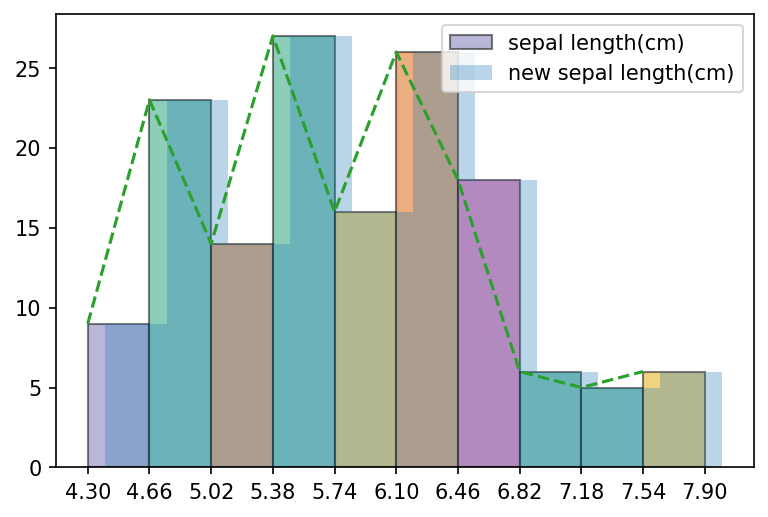

In [4]:
import palettable
import random
plt.figure(dpi=150)
data=pd_iris['sepal length(cm)']
n, bins, patches=plt.hist(x=data,
                          ##箱子数(bins)设置，以下三种不能同时并存
                          #bins=20,#default: 10
                          #bins=[4,6,8],#分两个箱子，边界分别为[4,6),[6,8]
                          #bins='auto',# 可选'auto', 'fd', 'doane', 'scott', 'stone', 'rice', 'sturges', or 'sqrt'.
                          #选择最合适的bin宽，绘制一个最能反映数据频率分布的直方图 
                         
                          #range=(5,7),#最左边和最右边箱子边界，不指定时，为(x.min(), x.max())
                          #density=True, #默认为False，y轴显示频数；为True y轴显示频率，频率统计结果=该区间频数/(x中总样本数*该区间宽度)
                          #weights=np.random.rand(len(x)),#对x中每一个样本设置权重，这里随机设置了权重
                          cumulative=False,#默认False，是否累加频数或者频率，及后面一个柱子是前面所有柱子的累加
                          bottom=0,#设置箱子y轴方向基线，默认为0，箱子高度=bottom to bottom + hist(x, bins)
                          histtype='bar',#直方图的类型默认为bar{'bar', 'barstacked', 'step', 'stepfilled'}
                          align='mid',#箱子边界值的对齐方式，默认为mid{'left', 'mid', 'right'}
                          orientation='vertical',#箱子水平还是垂直显示，默认垂直显示('vertical')，可选'horizontal'
                          rwidth=1.0,#每个箱子宽度，默认为1，此时显示50%
                          log=False,#y轴数据是否取对数，默认不取对数为False

color=palettable.colorbrewer.qualitative.Dark2_7.mpl_colors[3],
                          label='sepal length(cm)',#图例
                          #normed=0,#功能和density一样，二者不能同时使用
                          facecolor='black',#箱子颜色 
                          edgecolor="black",#箱子边框颜色
                          stacked=False,#多组数据是否堆叠
                          alpha=0.5#箱子透明度
                         )
plt.xticks(bins)#x轴刻度设置为箱子边界

for patch in patches:#每个箱子随机设置颜色
    patch.set_facecolor(random.choice(palettable.colorbrewer.qualitative.Dark2_7.mpl_colors))
 
#直方图三个返回值
print(n)#频数
print(bins)#箱子边界
print(patches)#箱子数
 
#直方图绘制分布曲线
plt.plot(bins[:10],n,'--',color='#2ca02c')
plt.hist(x=[i+0.1 for i in data],label='new sepal length(cm)',alpha=0.3)
plt.legend()


In [9]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
# Fixing random state for reproducibility
np.random.seed(19680801)

(array([3.0000e+00, 1.4000e+01, 6.9000e+01, 2.7700e+02, 9.6900e+02,
        2.5790e+03, 5.8010e+03, 1.0379e+04, 1.5122e+04, 1.7920e+04,
        1.7298e+04, 1.3536e+04, 8.6630e+03, 4.6080e+03, 1.8750e+03,
        6.4100e+02, 2.0000e+02, 3.7000e+01, 7.0000e+00, 2.0000e+00]),
 array([ 0.15026293,  0.64387908,  1.13749522,  1.63111136,  2.12472751,
         2.61834365,  3.11195979,  3.60557594,  4.09919208,  4.59280822,
         5.08642437,  5.58004051,  6.07365665,  6.5672728 ,  7.06088894,
         7.55450508,  8.04812123,  8.54173737,  9.03535351,  9.52896966,
        10.0225858 ]),
 <BarContainer object of 20 artists>)

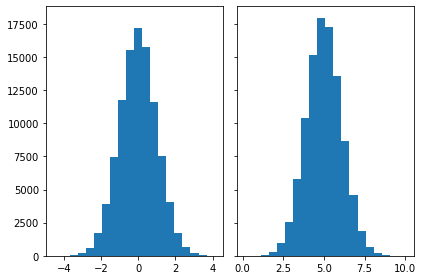

In [10]:
N_points = 100000
n_bins = 20

# Generate a normal distribution, center at x=0 and y=5
x = np.random.randn(N_points)
y = .4 * x + np.random.randn(100000) + 5

fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)

# We can set the number of bins with the `bins` kwarg
axs[0].hist(x, bins=n_bins)
axs[1].hist(y, bins=n_bins)

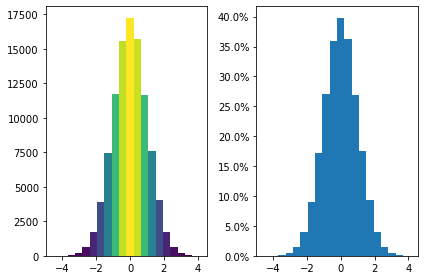

In [11]:
fig, axs = plt.subplots(1, 2, tight_layout=True)

# N is the count in each bin, bins is the lower-limit of the bin
N, bins, patches = axs[0].hist(x, bins=n_bins)

# We'll color code by height, but you could use any scalar
fracs = N / N.max()

# we need to normalize the data to 0..1 for the full range of the colormap
norm = colors.Normalize(fracs.min(), fracs.max())

# Now, we'll loop through our objects and set the color of each accordingly
for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.viridis(norm(thisfrac))
    thispatch.set_facecolor(color)

# We can also normalize our inputs by the total number of counts
axs[1].hist(x, bins=n_bins, density=True)

# Now we format the y-axis to display percentage
axs[1].yaxis.set_major_formatter(PercentFormatter(xmax=1))

https://www.popsugar.com/love/Best-Erotic-Reading-Sites-44115432